In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sim_functions import *

from tqdm import tqdm

from scipy.optimize import curve_fit

Using cupy


In [2]:
f_result = np.load("f_simulation.npy")

(4, 9, 1000, 250)
(4, 1000, 250)
152.81859072829297


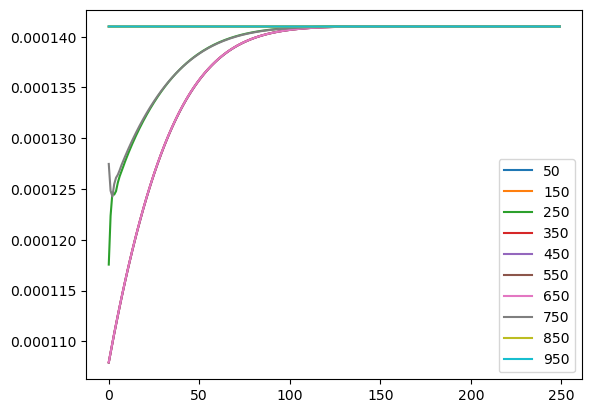

In [3]:
print(f_result.shape)
nx = f_result.shape[2]
rho_s = xp.sum(f_result, axis = 1, dtype = DTYPE)
print(rho_s.shape)
for i in range(10):
    plt.plot(rho_s[1, i*(nx//10)+nx//20, :], label = f'{i*(nx//10)+nx//20}')
plt.legend()

slope = (rho_s[1, nx//2, 5]-rho_s[1, nx//2, 0])/5
b1_measured = rho_s[1, 50, 0]/slope
print(b1_measured)

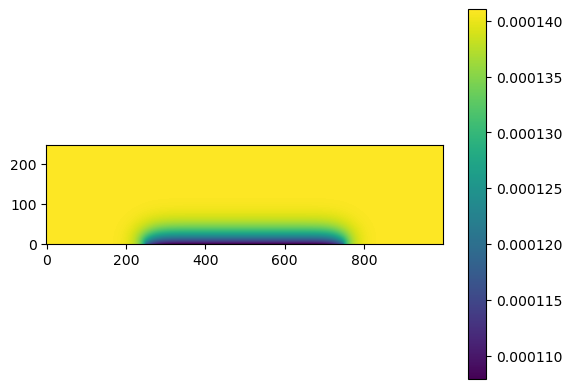

In [7]:
plt.imshow(rho_s[1, :, :].T, origin = 'lower')
plt.colorbar()

In [4]:
L_growth = 0.038 # m
n_grid = nx//2

L_grid = L_growth/n_grid
print(L_grid * 1e6, "micrometers")

76.0 micrometers


In [6]:
L_sample = 500e-6 # 500 um
n_points = L_sample/L_grid
print(round(n_points))

partial_pressure = rho_s[:, nx//2, round(n_points)]/3
print(partial_pressure)
print(np.sum(partial_pressure))

c_top = np.array([0.979, 0.000047, 0.0204, 1e-4])
print(partial_pressure-c_top)
print((partial_pressure-c_top)/c_top)

7
[9.7900802e-01 3.8082067e-05 2.0392561e-02 1.2089202e-04]
0.9995595
[ 8.01897049e-06 -8.91793252e-06 -7.43866861e-06  2.08920221e-05]
[ 8.19098109e-06 -1.89743245e-01 -3.64640618e-04  2.08920221e-01]


In [28]:
L_sample = 500e-6 # 500 um
n_points = L_sample/L_grid
print(round(n_points))

partial_pressure = rho_s[:, nx//2, round(n_points)]/3
print(partial_pressure)
print(np.sum(partial_pressure))

c_top = np.array([0.979, 0.0047, 0.0204, 1e-4])
print(partial_pressure-c_top)
print((partial_pressure-c_top)/c_top)

7
[0.97789747 0.00274502 0.01650767 0.01102526]
1.0081755
[-0.00110253 -0.00195498 -0.00389233  0.01092526]
[-1.12618465e-03 -4.15953346e-01 -1.90800568e-01  1.09252602e+02]
